In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy as sp
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from drift.core import manager
from scipy.sparse import lil_matrix
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
from cora.util import hputil
from astropy.stats import gaussian_fwhm_to_sigma
from hirax_transfer.beams import separations
import healpy as hp
from cora.core import skysim
from cora.foreground import gaussianfg, galaxy
from log_red_cal_fewer_redblocks import Logcal_solutions, A_matrix, colour_scatterplot, Bls_counts, Scatterplot, log
from cora.foreground import gaussianfg, galaxy
from cora.util import coord
from drift.core import visibility
sys.path.insert(0,'/home/zahra/hirax_tools/')
from hirax_tools import array_config

In [2]:
time_channel=400
Ndish=25
Nbls=Ndish*(Ndish-1)/2

m=manager.ProductManager.from_config('/home/zahra/PIPELINE/example_5by5_kl_nodishscatter_lmax_200/prod_params_custom.yaml')
correlation_arr, sum_counts, arranged_corr_counts, arranged_corr_unique_bls = Bls_counts(m)

#m=manager.ProductManager.from_config('/home/zahra/PIPELINE/example_8by8/prod_params_custom.yaml')

t=m.telescope
x=t.feedpositions[:,0] #these are x and y positions not x and y polarizations
y=t.feedpositions[:,1]

Product directory: /home/zahra/PIPELINE/example_5by5_kl_nodishscatter_lmax_200/bt_matrices


In [3]:
runs=10
time_channel=400
sigma = 0.001
sky = 1.

In [4]:
lmax = t.lmax
mmax = t.mmax
nside = 128
print nside
angpos = hputil.ang_positions(nside)
zenith = t.zenith #same as np.radians(120)
frequencies = t.frequencies
print zenith
print angpos.max()

128
[2.0943951 0.       ]
6.277049384028044


In [5]:
wavelength = (3.e8)/(600.*10.**6)
fwhm = 1.*wavelength/6.
sigma_beam = gaussian_fwhm_to_sigma*fwhm
seps = separations(angpos, zenith)
beammodel = np.exp(-seps**2/2/sigma_beam**2)
print beammodel

[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.61922971e-192
 1.61922971e-192 3.05744225e-189]


In [6]:
sph_arr = coord.sph_to_cart(angpos)
print np.unique(sph_arr[:,:2]).shape
sph_arr[sph_arr>0]

(180452,)


array([0.00451053, 0.00451053, 0.99997965, ..., 0.00451053, 0.00451053,
       0.00451053])

In [7]:
uhatc, vhatc = visibility.uv_plane_cart(zenith)
print uhatc
print vhatc

[6.123234e-17 1.000000e+00 6.123234e-17]
[0.5       0.        0.8660254]


In [8]:
HAC = array_config.HIRAXArrayConfig.from_n_elem_compact(Ndish, 6.)


#uv = np.resize(np.repeat(3, sph_arr.shape[0]),(3, )
#print uv.shape

vis_all = np.array([])
fringes_all = np.array([])

for i in correlation_arr:
    dish_0, dish_1 = i
    bl_ind = [np.int(dish_0), np.int(dish_1)]
    #v_coord, u_coord, _ = HAC.uvw_coords(frequencies[0],bl_ind)
    u_coord = (x[bl_ind[0]] - x[bl_ind[1]])/wavelength
    v_coord = (y[bl_ind[0]] - y[bl_ind[1]])/wavelength
    uv = u_coord * uhatc + v_coord * vhatc
    #print np.inner(sph_arr[0], uv), 'print '
    #print np.exp(np.inner(sph_arr[0], uv)), 'exp'
    fringes_ind = np.exp(1j*2*np.pi*np.sum(np.inner(np.abs(sph_arr), np.abs(uv))))
    #print sph_arr.shape
    #print uv
    #fringes_ind = np.exp(1j*2*np.pi*np.sum(np.abs(np.inner(sph_arr, uv))))  
    #fringes_ind = np.exp(1j*2*np.pi*np.sum(np.inner(sph_arr, np.abs(uv))))
    vis_ind = np.sum(beammodel**2*fringes_ind*sky)
    vis_all = np.append(vis_all, np.round(vis_ind, 3))
    fringes_all = np.append(fringes_all, fringes_ind)

In [9]:
vis_ = vis_all

vis_new = np.zeros(300, dtype= 'complex')
vis_new[:188] += vis_[:188]

vis_new[188:196] += vis_[188:196]
vis_new[196:204] += vis_[204:212]
vis_new[204:212] += vis_[196:204]
vis_new[212:220] += vis_[212:220]

vis_new[220:226] += vis_[220:226]
vis_new[226:232] += vis_[232:238]
vis_new[232:238] += vis_[226:232]
vis_new[238:244] += vis_[238:244]

vis_new[244:254] += vis_[244:254]

vis_new[254:258] += vis_[254:258]
vis_new[258:262] += vis_[262:266]
vis_new[262:266] += vis_[258:262]
vis_new[266:270] += vis_[266:270]

vis_new[270:274] += vis_[270:274]
vis_new[274:278] += vis_[274:278]

vis_new[278:281] += vis_[278:281]
vis_new[281:284] += vis_[284:287]
vis_new[284:287] += vis_[281:284]
vis_new[287:290] += vis_[287:290]

vis_new[290:292] += vis_[290:292]
vis_new[292:294] += vis_[294:296]
vis_new[294:296] += vis_[292:294]
vis_new[296:298] += vis_[296:298]

vis_new[298:299] += vis_[298:299]
vis_new[299:300] += vis_[299:300]


In [10]:
print np.unique(vis_new)

[-61.539 +0.585j -58.895+17.857j -56.309+24.833j -54.202-29.147j
 -43.826-43.205j -38.292-48.178j -28.889+54.34j  -22.12 +57.429j
 -15.028+59.679j  -0.293-61.541j   7.136-61.127j  14.46 -59.819j
  18.137+58.809j  25.101+56.191j  31.698+52.751j  37.832+48.54j
  43.413-43.62j   48.36 -38.063j  52.6  -31.949j  54.477+28.63j
  56.071-25.368j  57.534+21.847j  59.75 +14.745j  61.092 +7.427j]


In [11]:
arranged_corr_counts = np.load('arranged_corr_counts_5by5_24_red_blocks.npy')
lims = np.append(0, np.cumsum(arranged_corr_counts))

arranged_corr_unique_bls = np.load('arranged_corr_unique_bls_5by5_24_red_blocks.npy')
correlation_arr = np.load('corr_arr_5by5_24_red_blocks.npy')

In [12]:
def Measured_vis(sigma):
    mu = 0  
    N_real=np.random.normal(mu, sigma, Nbls)
    N_imag=np.random.normal(mu, sigma, Nbls)
    N_comp=np.array([])
    for i in range(len(N_real)):
        N_comp=np.append(N_comp,complex(N_real[i],N_imag[i]))
    meas_vis=vis_new+N_comp
    return meas_vis

meas_vis=Measured_vis(sigma)

In [13]:
rg_2=h5py.File('/home/zahra/PIPELINE/example_5by5_kl_nodishscatter_lmax_200/draco_synthesis_no_fluc/rand_gains/sig_2.h5','r')
rg = rg_2['gain'][0,:,time_channel]
gain=rg[:Ndish]

In [14]:
x_true_real = Logcal_solutions(m,vis_new,vis_new, gain,meas_vis, sigma)[2]


In [15]:
gg=np.zeros((runs,Ndish))
for ind_run in range(runs):
    meas_vis = Measured_vis(sigma)    
    gg[ind_run,:] = Logcal_solutions(m,vis_new,vis_new, gain,meas_vis, sigma)[0][:Ndish]  #5 for manual noise, 8 for gaussian noise 


In [16]:
print x_true_real[:Ndish]
print gg

[-3.22442073e-11 -1.13413168e-10 -6.73566758e-11 -7.89219801e-11
 -2.61305866e-10  4.32882619e-11 -1.03029918e-10 -2.25613972e-11
  1.90125693e-11 -1.31296085e-11  7.87891974e-11  9.91304816e-11
 -8.46749337e-11 -4.63282745e-11 -5.34094990e-11  6.01076966e-11
  1.63216329e-10 -1.79231074e-11 -1.04244391e-10 -6.74572620e-11
 -4.73963091e-11 -5.26222399e-11  1.10337961e-10 -1.56651803e-10
 -1.30448763e-10]
[[-1.90734863e-06  3.09944153e-06  0.00000000e+00 -2.14576721e-06
   1.43051147e-06  5.72204590e-06 -2.38418579e-07 -8.10623169e-06
  -4.76837158e-06 -1.19209290e-06 -5.00679016e-06 -2.38418579e-06
  -4.76837158e-07  0.00000000e+00  3.81469727e-06 -4.52995300e-06
   1.90734863e-06 -3.33786011e-06 -3.33786011e-06 -3.81469727e-06
   3.33786011e-06  1.66893005e-06  2.14576721e-06  1.90734863e-06
   5.72204590e-06]
 [ 3.09944153e-06  8.10623169e-06 -1.90734863e-06  1.90734863e-06
   6.67572021e-06  4.05311584e-06  0.00000000e+00  4.29153442e-06
  -2.86102295e-06  0.00000000e+00 -1.19209290

In [17]:
gg_logcal, sim_gains_logcal = gg, x_true_real[:Ndish]
def gains_mean_and_rel_err(gg,sim_gains_amp):
    gain_std=(np.std(gg,axis=0)/np.sqrt(runs)).flatten()
    gain_mean=np.mean(gg,axis=0).flatten() #shape is 98, we take every second one for amp so shape is 49
    rec_gains_mean_amp=gain_mean
    rec_gains_std_amp=gain_std
    rel_err_amp=np.abs(rec_gains_mean_amp-sim_gains_amp)/(sim_gains_amp)
    rel_err_amp_mean=np.mean(rel_err_amp)
    rel_err_amp_std=np.std(rel_err_amp,ddof=1)
    return rec_gains_mean_amp, rec_gains_std_amp, rel_err_amp, rel_err_amp_mean, rel_err_amp_std

rec_gains_mean_amp_2,_,rel_err_amp_2, rel_err_amp_mean_2 ,rel_err_amp_std_2 = gains_mean_and_rel_err(np.exp(gg_logcal),np.exp(sim_gains_logcal))
#rec_gains_mean_amp_2,_,rel_err_amp_2, rel_err_amp_mean_2 ,rel_err_amp_std_2 = gains_mean_and_rel_err(gg_logcal,1+sim_gains_logcal)

print rel_err_amp_mean_2, rel_err_amp_std_2

9.470229037519063e-07 5.753375401810992e-07


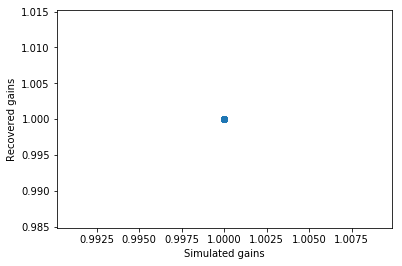

In [18]:
fig, ax = plt.subplots()

ax.scatter(np.exp(sim_gains_logcal),rec_gains_mean_amp_2)
#ax.plot(lims, lims,'g')
#plt.errorbar(x_true_real[:Ndish,time_channel],x_rec_real[:Ndish,time_channel],xerr=None,yerr=error[:Ndish],linestyle="None")
plt.xlabel('Simulated gains')
plt.ylabel('Recovered gains')
lim=.002
#plt.ylim(0.998,1.002)
#plt.savefig('avgd_recgains_vs_simgains_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')

plt.show()

In [19]:
def hist_rel_err_mean_std_logcal(gg,sim_gains_amp):
    gg_amp=gg
    rel_error=(np.abs(gg_amp-sim_gains_amp))/(sim_gains_amp)
    gg_amp_mean=np.mean(rel_error,axis=1) #shape is number of runs
    gg_amp_std=np.std(rel_error,axis=1, ddof=1)
    return gg_amp_std, gg_amp_mean

def hist_rel_err_mean_std(gg,sim_gains_amp):
    gg_amp=gg[:,0::2]
    rel_error=np.abs((gg_amp-sim_gains_amp))/sim_gains_amp
    gg_amp_mean=np.mean(rel_error,axis=1) #shape is number of runs
    gg_amp_std=np.std(rel_error,axis=1,ddof=1)
    return gg_amp_std, gg_amp_mean


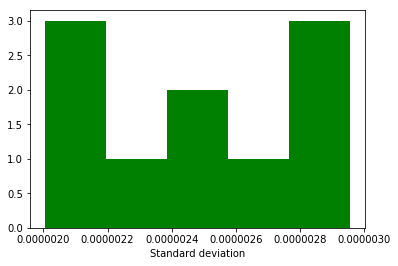

In [20]:
std, mean=hist_rel_err_mean_std_logcal(np.exp(gg_logcal),np.exp(sim_gains_logcal))
plt.hist(std,'auto',color='g')
#plt.hist(gg_amp_std_1m_logcal,'auto',color='g')
plt.xlabel('Standard deviation')
#plt.title('Logcal')
#plt.savefig('std_hist_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')
plt.show()

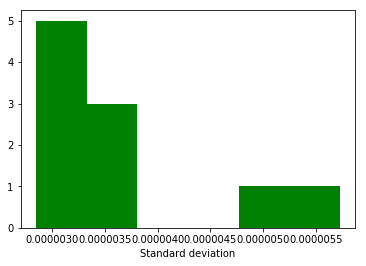

In [21]:
plt.hist(mean,'auto',color='g')
#plt.hist(gg_amp_std_1m_logcal,'auto',color='g')
plt.xlabel('Standard deviation')
#plt.title('Logcal')
#plt.savefig('std_hist_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')
plt.show()